In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
# reading the data
df = pd.read_csv("./data/historical_data.csv")
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
1,Date,NaN,NaN,NaN,NaN,NaN
2,2007-09-17,4494.64990234375,4549.0498046875,4482.85009765625,4518.4501953125,0
3,2007-09-18,4546.2001953125,4551.7998046875,4481.5498046875,4494.10009765625,0
4,2007-09-19,4732.35009765625,4739.0,4550.25,4550.25,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239 entries, 0 to 4238
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   4239 non-null   object
 1   Close   4238 non-null   object
 2   High    4238 non-null   object
 3   Low     4238 non-null   object
 4   Open    4238 non-null   object
 5   Volume  4238 non-null   object
dtypes: object(6)
memory usage: 198.8+ KB


In [4]:
df.shape

(4239, 6)

In [5]:
df.isnull().sum()

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,Price,Close,High,Low,Open,Volume
count,4238,4238,4238,4238,4238,4238
unique,4238,4188,4201,4199,4197,2070
top,2024-12-30,5486.14990234375,8250.7998046875,2611.949951171875,5960.39990234375,0
freq,1,3,2,2,2,1333


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.rename(columns={'Price':'Price-Date'}, inplace=True)

In [10]:
df.head()

,Price-Date,Close,High,Low,Open,Volume
0,Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
2,2007-09-17,4494.64990234375,4549.0498046875,4482.85009765625,4518.4501953125,0
3,2007-09-18,4546.2001953125,4551.7998046875,4481.5498046875,4494.10009765625,0
4,2007-09-19,4732.35009765625,4739.0,4550.25,4550.25,0
5,2007-09-20,4747.5498046875,4760.85009765625,4721.14990234375,4734.85009765625,0


In [11]:
df = df.iloc[1:,:]

In [12]:
df.head()

,Price-Date,Close,High,Low,Open,Volume
2,2007-09-17,4494.64990234375,4549.0498046875,4482.85009765625,4518.4501953125,0
3,2007-09-18,4546.2001953125,4551.7998046875,4481.5498046875,4494.10009765625,0
4,2007-09-19,4732.35009765625,4739.0,4550.25,4550.25,0
5,2007-09-20,4747.5498046875,4760.85009765625,4721.14990234375,4734.85009765625,0
6,2007-09-21,4837.5498046875,4855.7001953125,4733.7001953125,4752.9501953125,0


In [13]:
df.dtypes

Price-Date    object
Close         object
High          object
Low           object
Open          object
Volume        object
dtype: object

In [14]:
df['Price-Date'] = pd.to_datetime(df['Price-Date'], errors='coerce')

In [15]:
df['Price-Date'].isnull().sum()

np.int64(0)

In [16]:
col = df.columns.to_list()
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

In [17]:
df[col[1:]] = df[col[1:]].apply(pd.to_numeric, errors='coerce')

In [18]:
df.dtypes

Price-Date    datetime64[ns]
Close                float64
High                 float64
Low                  float64
Open                 float64
Volume                 int64
dtype: object

In [20]:
df['Year'] = df['Price-Date'].dt.year
df['Month'] = df['Price-Date'].dt.month
df['Weekday'] = df['Price-Date'].dt.weekday  # returns 0 for Monday ... 6 for Sunday

In [21]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100  # Volatility
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100
df['Avg_Price'] = (df['High'] + df['Low'] + df['Close']) / 3

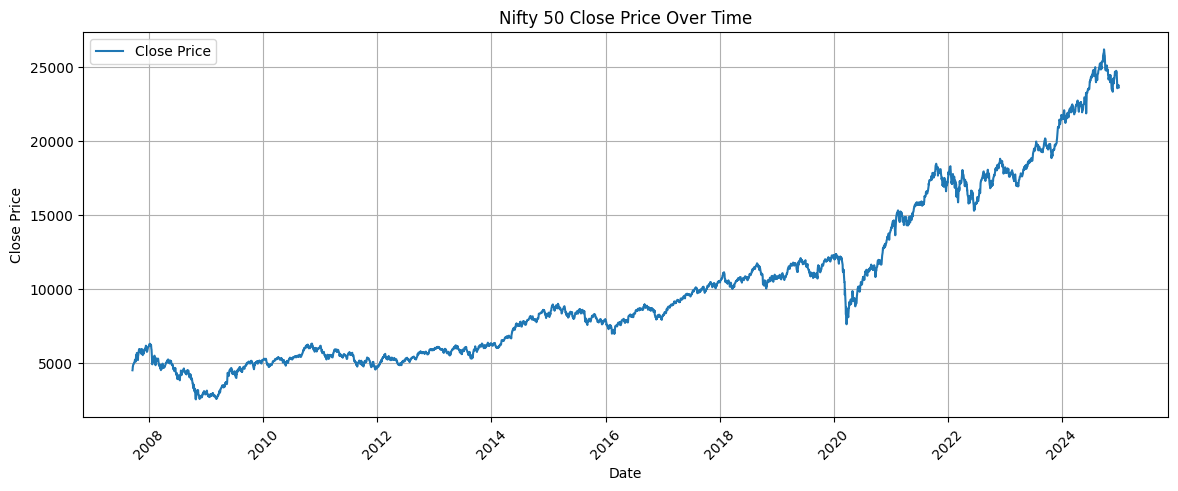

In [22]:
# Time Series Plot — Close Price
plt.figure(figsize=(14,5))
plt.plot(df['Price-Date'], df['Close'], label='Close Price')
plt.title("Nifty 50 Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [23]:
cor = df.corr(numeric_only=True)
cor

,Close,High,Low,Open,Volume,Year,Month,Weekday,HL_PCT,PCT_change,Avg_Price
Close,1.000000,0.999927,0.999927,0.999848,0.516364,0.919878,0.051857,0.002885,-0.316158,-0.002442,0.999981
High,0.999927,1.000000,0.999880,0.999938,0.518109,0.919725,0.051305,0.002884,-0.310454,-0.009843,0.999965
Low,0.999927,0.999880,1.000000,0.999902,0.514598,0.920076,0.052283,0.002901,-0.322532,-0.008741,0.999965
Open,0.999848,0.999938,0.999902,1.000000,0.516960,0.920008,0.051654,0.002692,-0.314943,-0.016979,0.999926
Volume,0.516364,0.518109,0.514598,0.516960,1.000000,0.692995,-0.030706,0.052615,-0.094125,-0.026165,0.516376
Year,0.919878,0.919725,0.920076,0.920008,0.692995,1.000000,-0.033876,0.004354,-0.377431,-0.016674,0.919919
Month,0.051857,0.051305,0.052283,0.051654,-0.030706,-0.033876,1.000000,0.003294,-0.032328,0.008629,0.051815
Weekday,0.002885,0.002884,0.002901,0.002692,0.052615,0.004354,0.003294,1.000000,-0.005603,0.006220,0.002890
HL_PCT,-0.316158,-0.310454,-0.322532,-0.314943,-0.094125,-0.377431,-0.032328,-0.005603,1.000000,-0.058989,-0.316377
PCT_change,-0.002442,-0.009843,-0.008741,-0.016979,-0.026165,-0.016674,0.008629,0.006220,-0.058989,1.000000,-0.007010


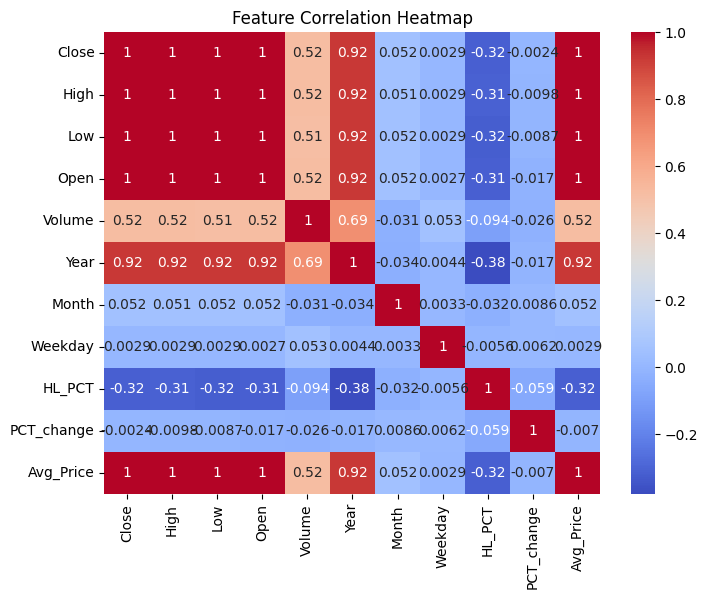

In [24]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


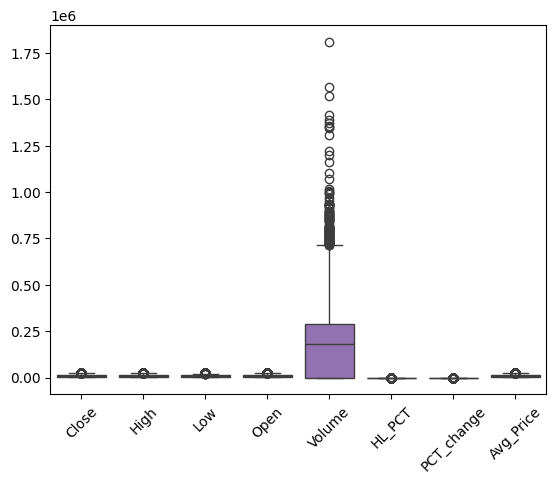

In [25]:
sns.boxplot(df.select_dtypes(include=['int64','float64']))
plt.xticks(rotation=45)
plt.show()

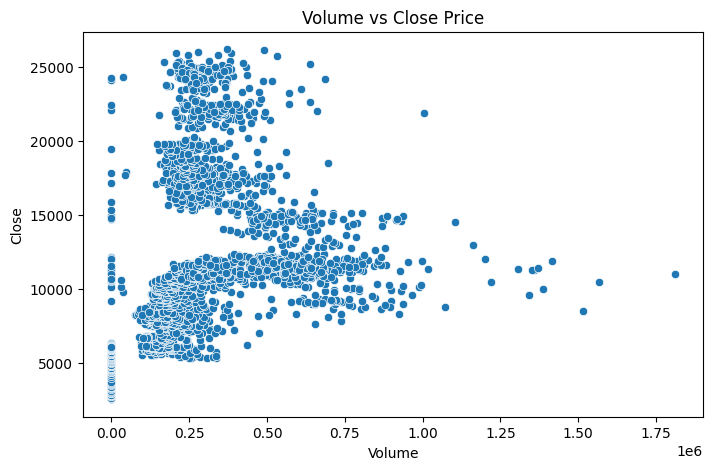

In [26]:
# Volume vs Close (Scatter)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Volume', y='Close')
plt.title("Volume vs Close Price")
plt.show()

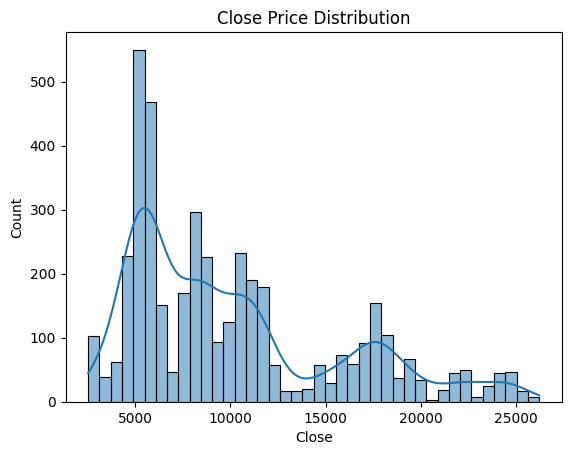

In [27]:
# Distribution of 'Close' Price
sns.histplot(df['Close'], kde=True, bins=40)
plt.title("Close Price Distribution")
plt.show()

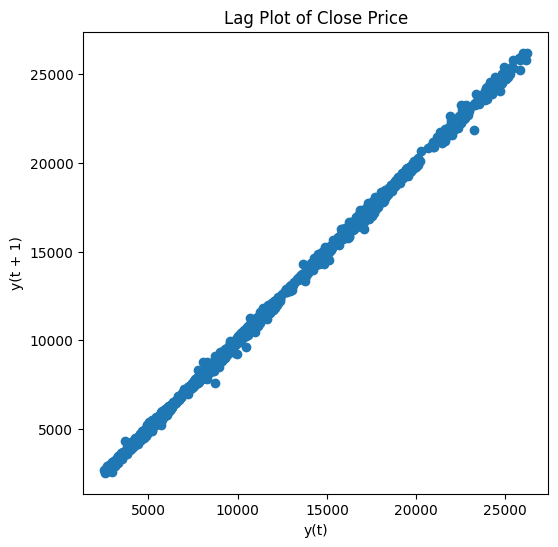

In [28]:
from pandas.plotting import lag_plot

# Lag Plot
plt.figure(figsize=(6,6))
lag_plot(df['Close'])
plt.title("Lag Plot of Close Price")
plt.show()


In [29]:
df.to_csv("./data/historical_data_prepro.csv")